## Cleaning the weather data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

### First, read the data, remove the unnecessary columns, and make the date column a date.

In [2]:
w_raw = pd.read_csv('./Weather_4.csv')

In [3]:
w_raw.columns.values

array(['STATION', 'STATION_NAME', 'DATE', 'PRCP', 'SNWD', 'SNOW', 'TAVG',
       'TMAX', 'TMIN', 'WESD', 'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5',
       'PGTM', 'FMTM', 'WT09', 'WT14', 'WT07', 'WT01', 'WT15', 'WT17',
       'WT06', 'WT21', 'WT05', 'WT02', 'WT11', 'WT22', 'WT04', 'WT13',
       'WT16', 'WT08', 'WT18', 'WT03', 'WT19'], dtype=object)

In [4]:
w_raw2 = w_raw[['DATE','PRCP','SNOW','TAVG','TMAX','TMIN','AWND']]

In [5]:
w_raw2.head(5)

,DATE,PRCP,SNOW,TAVG,TMAX,TMIN,AWND
0,20100101,0.0,0.0,-9999,16,5,10.3
1,20100102,0.0,0.0,-9999,11,2,11.9
2,20100103,0.0,0.0,-9999,18,-1,10.3
3,20100104,0.0,0.0,-9999,18,7,11.4
4,20100105,0.0,0.0,-9999,23,13,8.5


In [6]:
w_raw2['date'] = pd.to_datetime(w_raw2.DATE,format='%Y%m%d')
w_raw2['month'] = w_raw2.date.map(lambda x: x.month)
w_raw2['year'] = w_raw2.date.map(lambda x: x.year)
w_raw2['day'] = w_raw2.date.map(lambda x: x.day)


C:\Users\Andrew\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Andrew\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Andrew\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [7]:
w_raw2.head(5)

,DATE,PRCP,SNOW,TAVG,TMAX,TMIN,AWND,date,month,year,day
0,20100101,0.0,0.0,-9999,16,5,10.3,2010-01-01,1,2010,1
1,20100102,0.0,0.0,-9999,11,2,11.9,2010-01-02,1,2010,2
2,20100103,0.0,0.0,-9999,18,-1,10.3,2010-01-03,1,2010,3
3,20100104,0.0,0.0,-9999,18,7,11.4,2010-01-04,1,2010,4
4,20100105,0.0,0.0,-9999,23,13,8.5,2010-01-05,1,2010,5


In [8]:
w_raw2 = w_raw2.drop(['DATE'],axis=1)
w_raw2.head(5)

,PRCP,SNOW,TAVG,TMAX,TMIN,AWND,date,month,year,day
0,0.0,0.0,-9999,16,5,10.3,2010-01-01,1,2010,1
1,0.0,0.0,-9999,11,2,11.9,2010-01-02,1,2010,2
2,0.0,0.0,-9999,18,-1,10.3,2010-01-03,1,2010,3
3,0.0,0.0,-9999,18,7,11.4,2010-01-04,1,2010,4
4,0.0,0.0,-9999,23,13,8.5,2010-01-05,1,2010,5


In [9]:
w_raw2.columns = [w.lower() for w in w_raw2.columns]

In [10]:
w_raw2.head(5)

,prcp,snow,tavg,tmax,tmin,awnd,date,month,year,day
0,0.0,0.0,-9999,16,5,10.3,2010-01-01,1,2010,1
1,0.0,0.0,-9999,11,2,11.9,2010-01-02,1,2010,2
2,0.0,0.0,-9999,18,-1,10.3,2010-01-03,1,2010,3
3,0.0,0.0,-9999,18,7,11.4,2010-01-04,1,2010,4
4,0.0,0.0,-9999,23,13,8.5,2010-01-05,1,2010,5


In [11]:
w = w_raw2

### Next, remove the -9999 code for missing values and make them nulls

In [12]:
w[w==-9999] = np.nan

In [13]:
(w==-9999).sum()

prcp     0
snow     0
tavg     0
tmax     0
tmin     0
awnd     0
date     0
month    0
year     0
day      0
dtype: int64

In [14]:
w.head(5)

,prcp,snow,tavg,tmax,tmin,awnd,date,month,year,day
0,0.0,0.0,NaN,16.0,5.0,10.3,2010-01-01,1,2010,1
1,0.0,0.0,NaN,11.0,2.0,11.9,2010-01-02,1,2010,2
2,0.0,0.0,NaN,18.0,-1.0,10.3,2010-01-03,1,2010,3
3,0.0,0.0,NaN,18.0,7.0,11.4,2010-01-04,1,2010,4
4,0.0,0.0,NaN,23.0,13.0,8.5,2010-01-05,1,2010,5


In [15]:
w.isnull().sum()

prcp        2
snow        2
tavg     1186
tmax        2
tmin        2
awnd        2
date        0
month       0
year        0
day         0
dtype: int64

### Next, plot histograms of each of the fields to make sure they are reasonable.

In [19]:
w.describe()

,prcp,snow,tavg,tmax,tmin,awnd,month,year,day
count,2494.000000,2494.000000,1310.000000,2494.000000,2494.000000,2494.000000,2496.000000,2496.000000,2496.000000
mean,0.107366,0.122334,52.203817,60.056937,42.494787,9.623577,6.400641,2012.927484,15.730369
std,0.314440,0.765152,20.246166,21.621771,19.428120,3.687143,3.400186,1.968476,8.802248
min,0.000000,0.000000,-8.000000,-2.000000,-16.000000,1.300000,1.000000,2010.000000,1.000000
25%,0.000000,0.000000,38.000000,42.000000,29.000000,6.900000,3.000000,2011.000000,8.000000
50%,0.000000,0.000000,55.000000,63.000000,43.000000,9.200000,6.000000,2013.000000,16.000000
75%,0.050000,0.000000,70.000000,79.000000,59.000000,11.600000,9.000000,2015.000000,23.000000
max,6.860000,16.200000,87.000000,103.000000,82.000000,26.600000,12.000000,2016.000000,31.000000


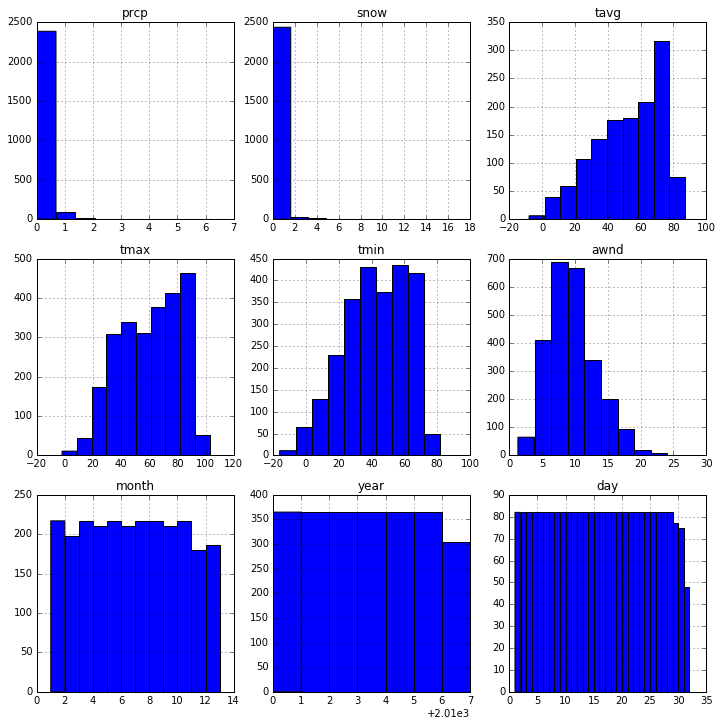

In [20]:
field_names = w.columns
field_names = field_names.drop('date')
fig,ax = plt.subplots(3,3,figsize=(12,12))
ax = ax.reshape(-1)

for i,fn in enumerate(field_names):
    dat = w[fn]
    if np.in1d(fn,('month','day','year')):
        #print dat.unique()
        bins = dat.unique()
        bins = np.append(bins,max(bins)+1)
        ax[i].hist(dat[dat.notnull()],bins=bins)
    else:
        ax[i].hist(dat[dat.notnull()])
    ax[i].set_title(str(fn))
    ax[i].grid('on')

### Plot the timeseries to make sure they are reasonable

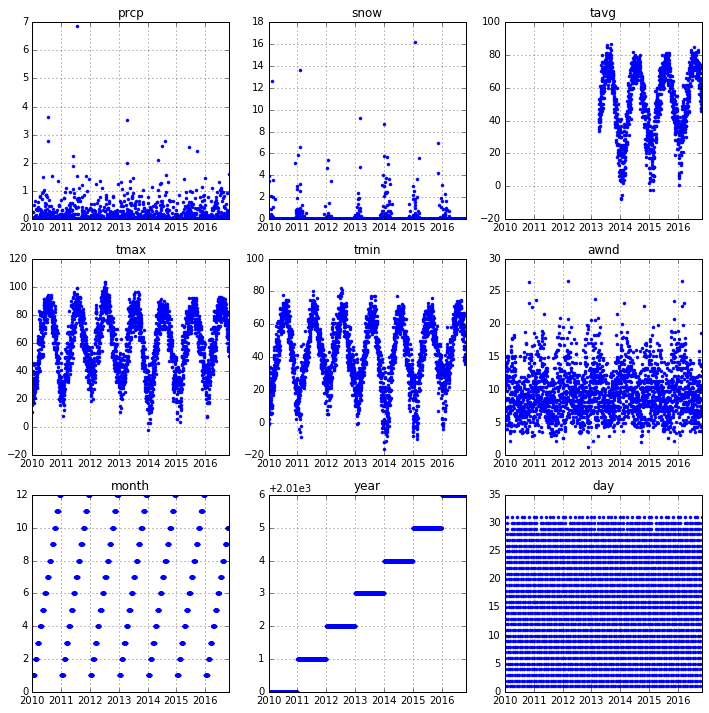

In [21]:
field_names = w.columns
field_names = field_names.drop('date')
fig,ax = plt.subplots(3,3,figsize=(12,12))
ax = ax.reshape(-1)

for i,fn in enumerate(field_names):
    dat = w[fn]
    ax[i].plot(w.date,dat,'.')
    ax[i].set_title(str(fn))
    ax[i].set_xlim([min(w.date),max(w.date)])
    ax[i].grid('on')

### Plot by month, one curve for each year, to see the seasonality

In [24]:
def plot_by_month(field_name,ax,str_name=None):
    if not str_name:
        str_name = field_name
    monthly_quantity = w[['year','month',field_name]].groupby(['year','month']).mean()
    values = monthly_quantity.unstack().T.values
    ax.plot(range(1,13),values)
    ax.plot(range(1,13),np.nanmean(values,axis=1).T,'k',linewidth=4)
    ax.set_xlabel('month')
    ax.set_ylabel(str_name)
    ax.set_xlim([1,12])
    ax.set_title(str_name.title())
    ax.legend([2010+i for i in range(7)],loc='best')
    #plt.show()

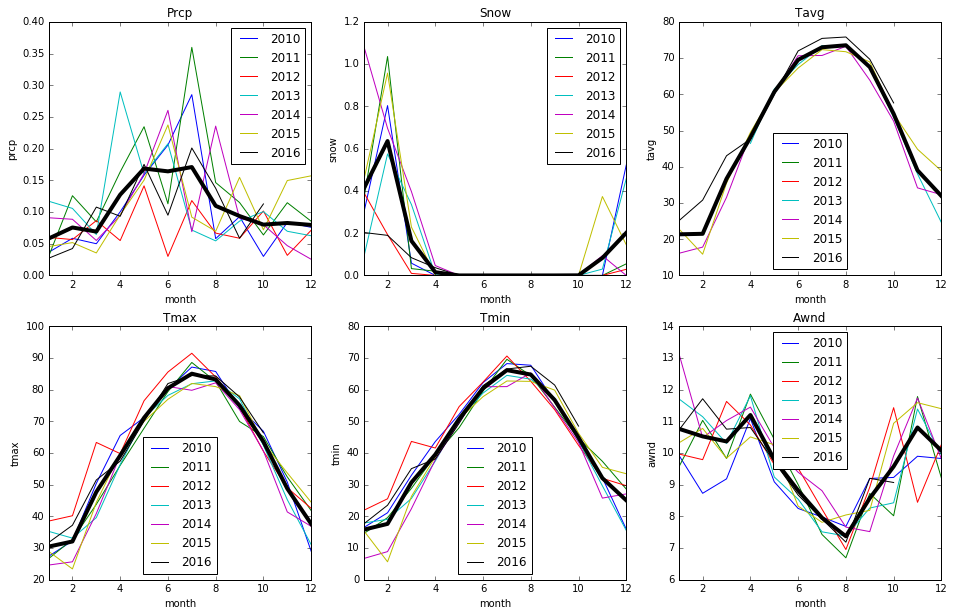

In [25]:
field_names = w.columns
field_names = field_names.drop(['date','year','month','day'])

fig, ax = plt.subplots(2,3,figsize=(16,10))
ax = ax.reshape(-1)
for i,fn in enumerate(field_names):
    plot_by_month(fn,ax[i])

### Save the pandas dataframe

In [26]:
w.to_csv('Weather_clean.csv',index=False)